# Students Do: Predicting Loan Default with Random Forests

In this activity, you are going to explore how random forest algorithm can be used to identify loans that are likely to default. You will use the `sba_loans_encoded.csv` file that you created before to train the model

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`

In [2]:
import gdown
file_id = '1ke6IXa6Hy7CaDlswYE2IF7FQKtyMNYtQ'
output = 'sba_loans_encoded.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ke6IXa6Hy7CaDlswYE2IF7FQKtyMNYtQ
To: /content/sba_loans_encoded.csv
100%|██████████| 2.91M/2.91M [00:00<00:00, 24.1MB/s]


'sba_loans_encoded.csv'

In [3]:
# Loading data
file_path = Path("sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_loans[['Default', 'Amount', 'Term']]

,Default,Amount,Term
0,0,32812,36
1,0,30000,56
2,0,30000,36
3,0,50000,36
4,0,343000,240
...,...,...,...
2092,0,150000,60
2093,0,99000,300
2094,0,50000,84
2095,0,251150,120


In [4]:
df_loans.columns

Index(['Year', 'Month', 'Amount', 'Term', 'Zip', 'CreateJob', 'NoEmp',
       'RealEstate', 'RevLineCr', 'UrbanRural',
       ...
       'City_WILLITS', 'City_WILMINGTON', 'City_WINDSOR', 'City_WINNETKA',
       'City_WOODLAND', 'City_WOODLAND HILLS', 'City_WRIGHTWOOD',
       'City_Watsonville', 'City_YORBA LINDA', 'City_YUBA CITY'],
      dtype='object', length=684)

Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [5]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [6]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]])

Split the data into training and testing sets.

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()



In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)



In [11]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [12]:
X_train_scaled

array([[-0.27425568, -1.04066994,  1.51742188, ..., -0.02522969,
        -0.05050763, -0.02522969],
       [ 0.49106372,  1.57915182, -0.24594326, ..., -0.02522969,
        -0.05050763, -0.02522969],
       [ 0.23595725, -0.74957863,  0.12063964, ..., -0.02522969,
        -0.05050763, -0.02522969],
       ...,
       [ 0.23595725, -1.33176124, -0.6762797 , ..., -0.02522969,
        -0.05050763, -0.02522969],
       [ 0.23595725, -1.33176124, -0.63762766, ..., -0.02522969,
        -0.05050763, -0.02522969],
       [ 0.74617019, -0.45848732, -0.67917759, ..., -0.02522969,
        -0.05050763, -0.02522969]])

## Fitting the Random Forest Model

Once data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [14]:
?RandomForestClassifier

In [15]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)



In [16]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Making Predictions Using the Random Forest Model

Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


In [18]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,330,14
Actual 1,36,145


Accuracy Score : 0.9047619047619048
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       344
           1       0.91      0.80      0.85       181

    accuracy                           0.90       525
   macro avg       0.91      0.88      0.89       525
weighted avg       0.91      0.90      0.90       525



<Axes: xlabel='Default'>

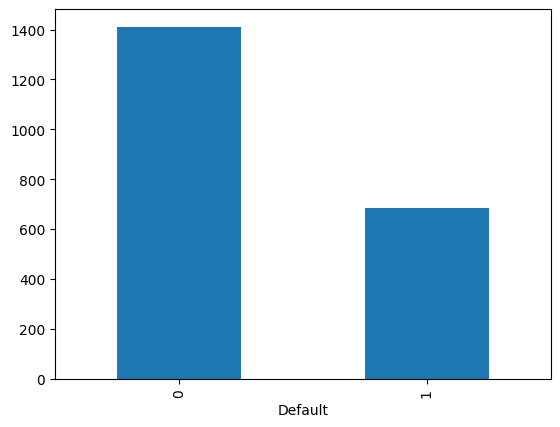

In [24]:
df_loans['Default'].value_counts().plot.bar()

## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [25]:
# Get the feature importance array
importances = rf_model.feature_importances_



In [26]:
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]


[(np.float64(0.32525509355569393), 'Term'),
 (np.float64(0.08731610602488035), 'Year'),
 (np.float64(0.07749126212056351), 'Amount'),
 (np.float64(0.04154318603507449), 'Zip'),
 (np.float64(0.0359707771436633), 'NoEmp'),
 (np.float64(0.030281829481746146), 'RealEstate'),
 (np.float64(0.028696674498168147), 'Month'),
 (np.float64(0.024032270489503894), 'CreateJob'),
 (np.float64(0.020296840586558236), 'RevLineCr'),
 (np.float64(0.017578173845109207), 'Bank_BANK OF AMERICA NATL ASSOC')]

## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions.

* **Question 1:** Would you trust in this model to deploy a loan default solution in a bank?

 * **Sample Answer:** Model's accuracy is better than using decision trees, so if we want to deploy a default prevention solution for loans in a Bank, we would trust in random forest more than in decision trees.


* **Question 2:** What are your insights about the top 10 most importance features?

 * **Sample Answer:** It seems that the Bank is not relevant for the model, so we can create a new random forest model by only taking these top 10 features. Also, for piloting this model in a business environment, we will only need to fetch new data about these 10 features.